In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


In [2]:
column_names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df=pd.read_csv('/kaggle/input/boston-house-prices/housing.csv',delim_whitespace=True,names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The variable we need predict is the **MEDV ** variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


df.shape()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
#checking for missing data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is no missing values in the data set.

Simple Linear Regression 

Regression, using the relationship between variables to find the best fit line or the regression equation that can be used to make preedictions.
The core idea is to obtain a line that best fits the data.

y=b0+b1*x
b0=coefficient
b1=constant(bias)

Simple linear regression is useful for finding relationship between two continuous variables. One is independent(x) variable and other is dependent(y) variable.

So i used CRIM column as x.
 

Text(0, 0.5, 'MEDV')

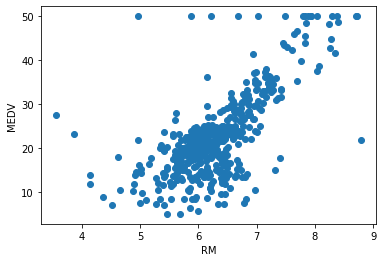

In [7]:
plt.scatter(df.RM,df.MEDV)
plt.xlabel("RM")
plt.ylabel("MEDV")

In [8]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
x=df.RM.values.reshape(-1,1)
y=df.MEDV.values.reshape(-1,1)
linear_regression.fit(x,y)


LinearRegression()

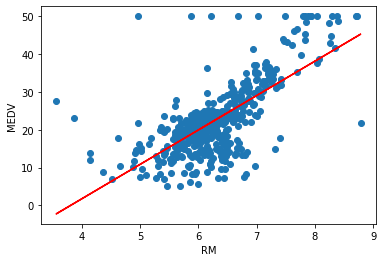

In [9]:
y_head=linear_regression.predict(x)
plt.scatter(df.RM,df.MEDV)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.plot(x,y_head,color="red")


In [10]:
#%% prediction
b0=linear_regression.predict([[0]])
b1=linear_regression.coef_
print("b0 is: ",b0)
print("b1 is: ",b1)

print("Predict: ",b1*80+b0)

b0 is:  [[-34.67062078]]
b1 is:  [[9.10210898]]
Predict:  [[693.49809772]]


In [11]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 0.48352545599133423


the closer the result is to one, the more accurate the guess will be

MULTIPLE LINEAR REGRESSION

In [12]:
from sklearn.linear_model import LinearRegression
x=df.iloc[:,[1,2,3,4,5]].values
y=df.RM.values.reshape(-1,1)
multiple_linear_reg=LinearRegression()
multiple_linear_reg.fit(x,y)
print("b0 is:",multiple_linear_reg.intercept_)
print("b1, b2,b3,b4,b5 are:",multiple_linear_reg.coef_)

b0 is: [8.8817842e-16]
b1, b2,b3,b4,b5 are: [[ 6.77860445e-18 -1.67006842e-17 -4.55184352e-16 -3.23817907e-17
   1.00000000e+00]]


Polynomial Linear Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_reg=PolynomialFeatures(degree=4)
x_polynomial=polynomial_reg.fit_transform(x)


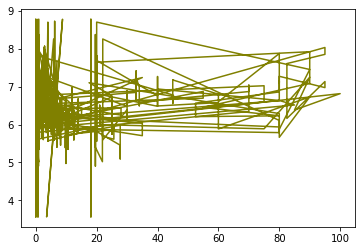

In [14]:
from sklearn.linear_model import LinearRegression
poly_reg=LinearRegression()
poly_reg.fit(x_polynomial,y)
y_head=poly_reg.predict(x_polynomial)
plt.plot(x,y_head,color="olive",label="polynomial")
plt.show()

In [15]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y,y_head))

r2_score 1.0


Decision Tree Regression

A decision tree is a supervised ml model used to predict a target by learning decision rules from features

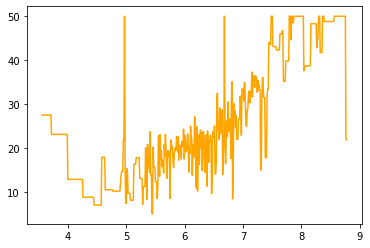

In [16]:
from sklearn.tree import DecisionTreeRegressor
x=df.RM.values.reshape(-1,1)
y=df.MEDV.values.reshape(-1,1)
Dtree=DecisionTreeRegressor()
Dtree.fit(x,y)
x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=Dtree.predict(x_)
plt.plot(x_,y_head,color="orange")
plt.show()

Random Forest Regression

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


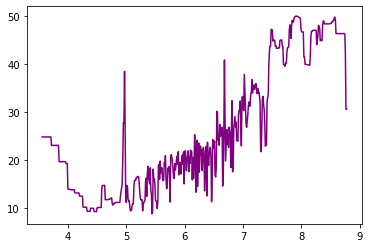

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=150,random_state=42)
rf.fit(x,y)
x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=rf.predict(x_)
plt.plot(x_,y_head,color="purple")
plt.show()